In [188]:
# !pip install pyecharts
# !pip install selenium
import numpy as np 
import matplotlib.pyplot as plt 
#!pip install yfinance
import yfinance as yf # https://pypi.org/project/yfinance/
import math
import random
import seaborn as sns
import datetime
import pandas as pd
from pyecharts.charts import Bar, Line
from pyecharts import options as opts
import warnings
warnings.filterwarnings(action='ignore') 

In [62]:
# get data by ticker-name, start-time & end-time
def get_df_data(ticker_name="AAPL", start_time="2022-01-01", end_time="2022-10-09"):
    df_data = yf.download(tickers=ticker_name, start=start_time, end=end_time) 
    df_data = df_data[ ["Open", "High", "Low", "Close", "Volume"] ]
    df_data['previous_Close'] = df_data['Close'].shift(1)
    df_data['daily_return'] = (df_data['Close']-df_data['previous_Close'])/df_data['previous_Close']
    return df_data

def time_point_dic(time_list, point_close):
    dic = {}
    i = 0
    while i<len(time_list):
        dic[time_list[i]] = point_close[i]
        i += 1
    return dic

# 
def data_union(dic1, dic2):
    # add in complement time values
    time1 = list(dic1.keys())
    time2 = list(dic2.keys())
    time_union = sorted(list(set(time1+time2)))
    for t in time_union:
        if t not in dic1:
            dic1[t] = -1
        if t not in dic2:
            dic2[t] = -1
    return time_union

def dic_lists(dic):
    x, y = [], []
    tl = sorted(list(dic.keys()))
    for i in range(len(tl)):
        x.append( tl[i] )
        #
        if i==0:
            v = dic[tl[i]]
            if v<0:
                print("the first day is not business day: ", x, v)
                return [], []
        #
        v = dic[tl[i]]
        if v<0 and i>0:
            dic[tl[i]] = dic[tl[i-1]]
            v = dic[tl[i]]
        y.append( round(v, 2) )
    return x, y

def draw_pair_stocks01(dic1, dic2, time_union, col_name, label1, label2):
    plt.subplots(figsize=(20, 10))

    x_values, y_values = dic_lists(dic1)
    plt.plot(time_union, y_values, label=col_name+"_"+label1)

    x_values, y_values = dic_lists(dic2)
    plt.plot(time_union, y_values, label=col_name+"_"+label2)

    plt.legend()
    plt.show()  # display 
    return 

def draw_pair_stocks02(dic1, dic2, time_union, col_name, label1, label2):
    _, y_list1 = dic_lists(dic1)
    _, y_list2 = dic_lists(dic2)
    
    y_global_min = min( min(y_list1), min(y_list2) )
    y_global_min = int(y_global_min)//10 * 10
    print("y_global_min:\t", y_global_min)
    line_returns = (
        Line(init_opts=opts.InitOpts(width="1800px", height="960px"))      
        .set_global_opts(title_opts=opts.TitleOpts(title="stocks comparison: HO OL"), 
                         tooltip_opts=opts.TooltipOpts(trigger="axis"),
                        yaxis_opts=opts.AxisOpts(name='returns',splitline_opts=opts.SplitLineOpts(is_show=True),min_=y_global_min))# , subtitle="商店A中六樣商品數"
    )
    
    line_returns.add_xaxis( time_union ) #list(range(len(y_list)))    
    line_returns.add_yaxis(col_name+"_"+label1, y_list1 )    
    line_returns.add_yaxis(col_name+"_"+label2, y_list2 )
    line_returns.render("lines02.html")
    return 

time range:	 2022-11-01 - 2023-01-31
[*********************100%***********************]  1 of 1 completed
stock:	 BABA 	 47
[*********************100%***********************]  1 of 1 completed
stock:	 9988.HK 	 48
stock:	 BABA 	 49
stock:	 9988.HK 	 49


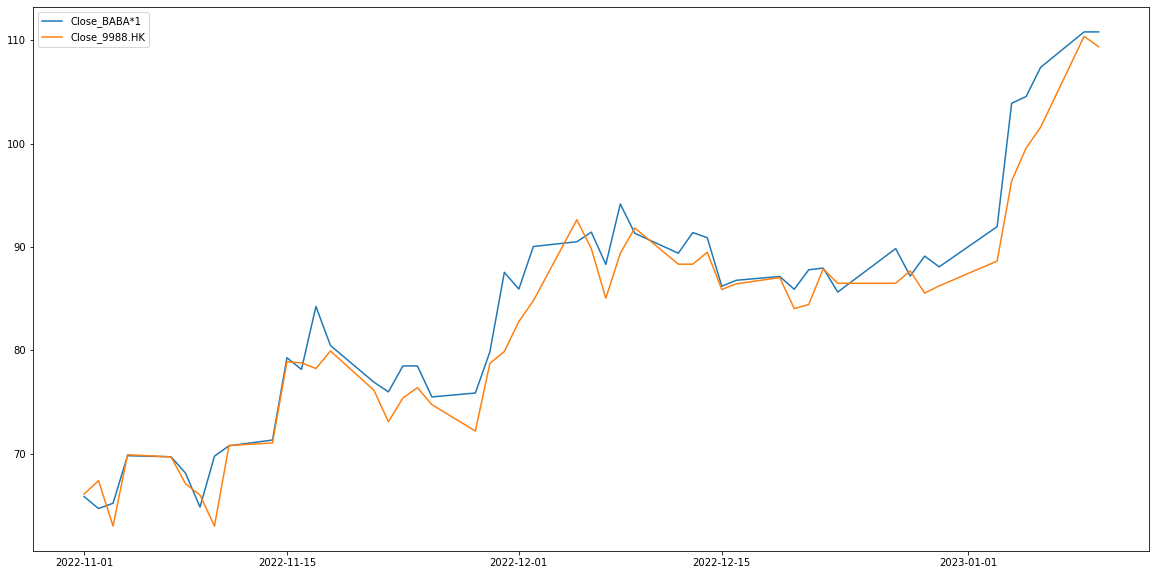

time range:	 2022-11-01 - 2023-01-31
[*********************100%***********************]  1 of 1 completed
stock:	 BIDU 	 47
[*********************100%***********************]  1 of 1 completed
stock:	 9888.HK 	 48
stock:	 BIDU 	 49
stock:	 9888.HK 	 49


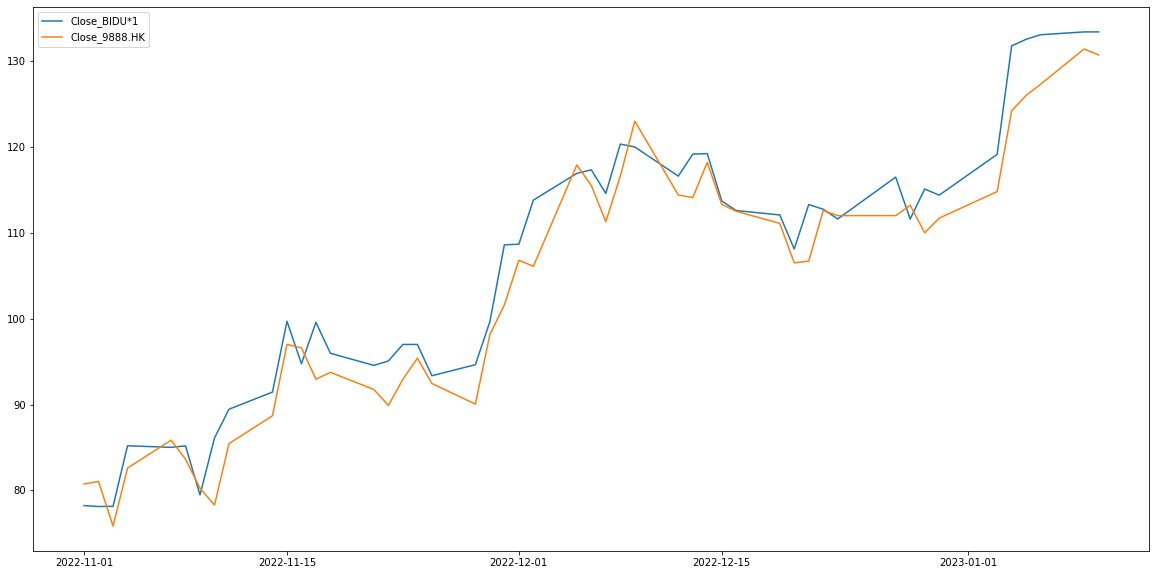

time range:	 2022-11-01 - 2023-01-31
[*********************100%***********************]  1 of 1 completed
stock:	 NTES 	 47
[*********************100%***********************]  1 of 1 completed
stock:	 9999.HK 	 48
stock:	 NTES 	 49
stock:	 9999.HK 	 49


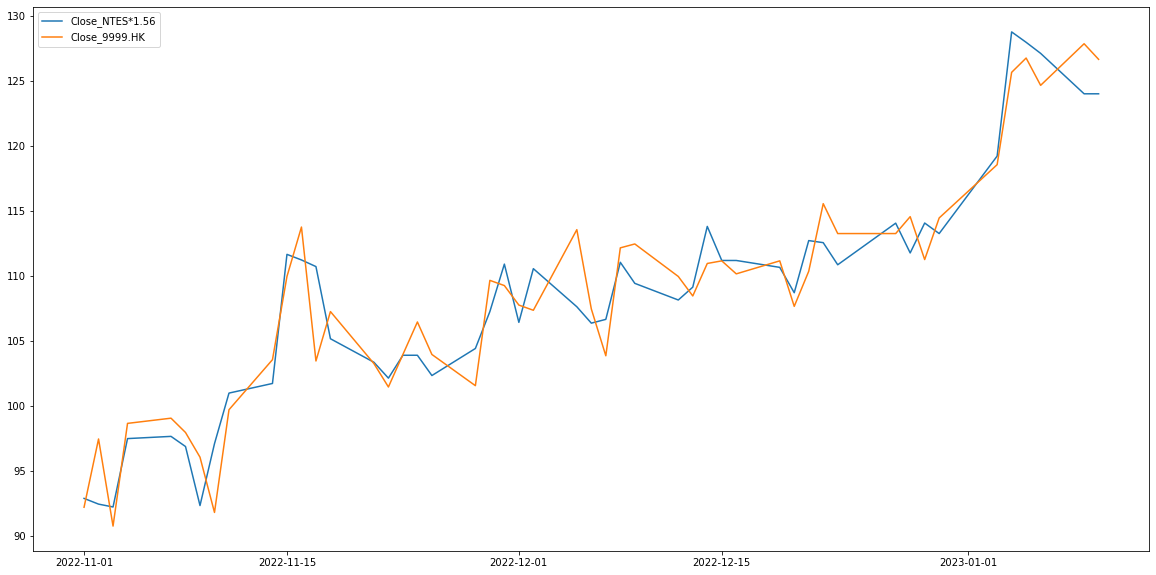

time range:	 2022-11-01 - 2023-01-31
[*********************100%***********************]  1 of 1 completed
stock:	 JD 	 47
[*********************100%***********************]  1 of 1 completed
stock:	 9618.HK 	 48
stock:	 JD 	 49
stock:	 9618.HK 	 49


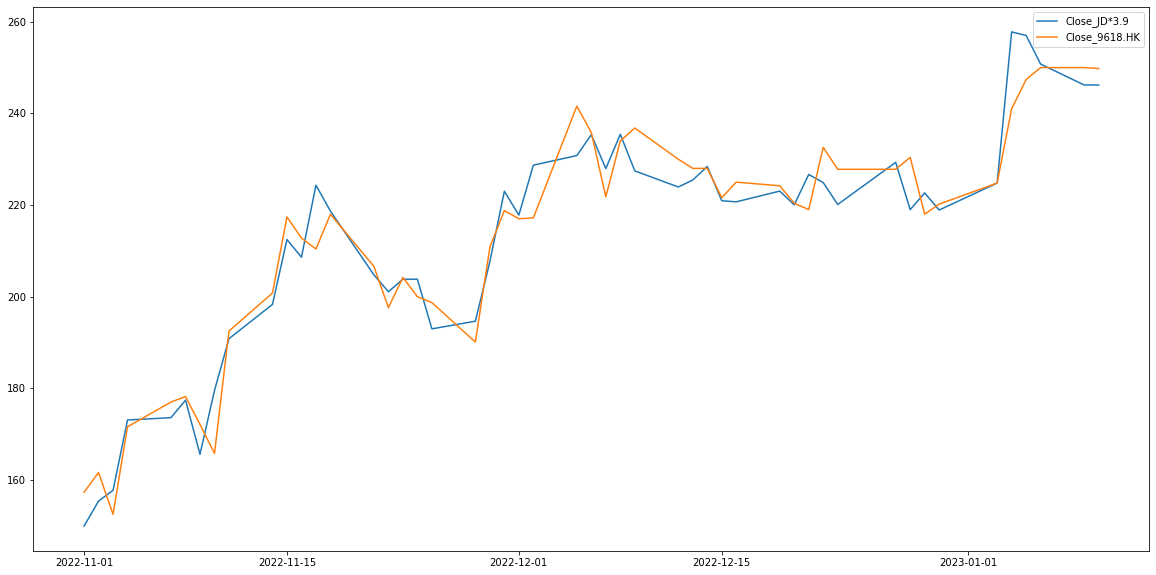

time range:	 2022-11-01 - 2023-01-31
[*********************100%***********************]  1 of 1 completed
stock:	 MPNGY 	 47
[*********************100%***********************]  1 of 1 completed
stock:	 3690.HK 	 48
stock:	 MPNGY 	 49
stock:	 3690.HK 	 49


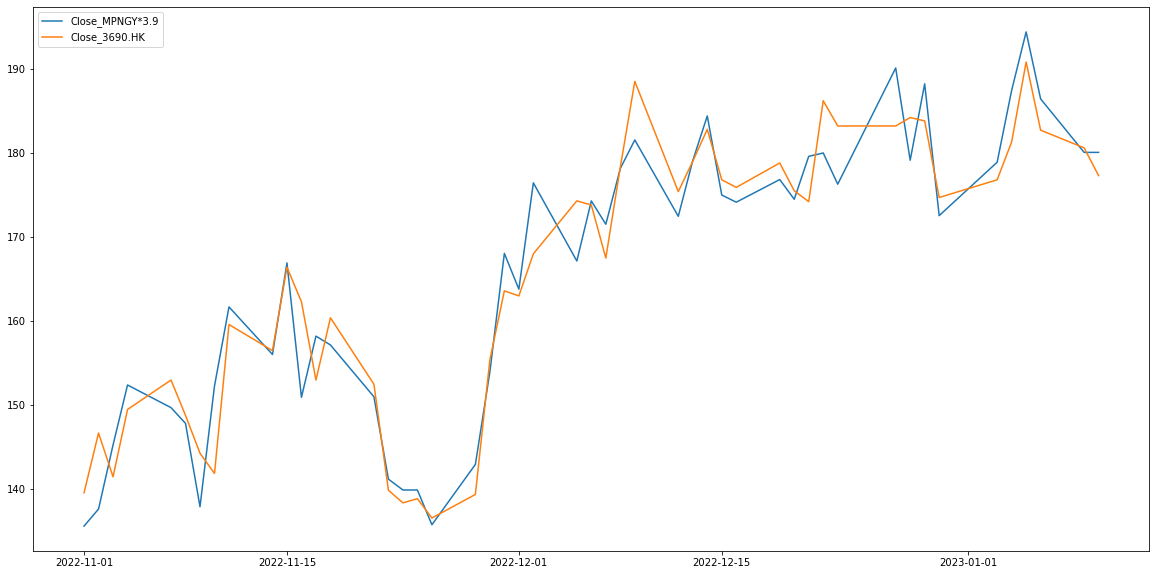

In [138]:
# 'BABA', '9988.HK', '2022-11-01', 1
# 'BIDU', '9888.HK', '2022-10-25', 1
# 'NTES', '9999.HK', '2022-10-26', 0.2 * 7.8
# 'JD', '9618.HK', '2022-10-24', 0.5 * 7.8
# 'MPNGY', '3690.HK', '2022-10-24', 0.5 * 7.8

stocks_info = [
    ('BABA', '9988.HK', '2022-11-01', 1),
    ('BIDU', '9888.HK', '2022-10-25', 1),
    ('NTES', '9999.HK', '2022-10-26', 0.2 * 7.8),
    ('JD', '9618.HK', '2022-10-24', 0.5 * 7.8),
    ('MPNGY', '3690.HK', '2022-10-24', 0.5 * 7.8)
]

for it in stocks_info:
    reference_stock, target_stock, st, ratio = it
    #reference_stock, target_stock, st, ratio = 'MPNGY', '3690.HK', '2022-10-24', 0.5 * 7.8
    st, et = "2022-11-01", "2023-01-31"
    print("time range:\t", st, "-", et)

    df_data1 = get_df_data(ticker_name=reference_stock, start_time=st, end_time=et)
    print("stock:\t", reference_stock, "\t", len(df_data1))
    df_data2 = get_df_data(ticker_name=target_stock, start_time=st, end_time=et)
    print("stock:\t", target_stock, "\t", len(df_data2))

    col_name = 'Close'
    ref_close = time_point_dic(list(df_data1.index), df_data1[col_name]*ratio)
    tar_close = time_point_dic(list(df_data2.index), df_data2[col_name])
    time_union = data_union(ref_close, tar_close)
    print("stock:\t", reference_stock, "\t", len(ref_close))
    print("stock:\t", target_stock, "\t", len(tar_close))

    label1 = str(reference_stock)+"*"+str(ratio)
    label2 = str(target_stock)
    draw_pair_stocks01(ref_close, tar_close, time_union, col_name, label1, label2)
    #draw_pair_stocks02(ref_close, tar_close, time_union, col_name, label1, label2)

In [214]:
def search_by_index(df_data, index_time):
    tmp_list = list(df_data.index)
    i = 0
    for t in tmp_list:
        if t>=index_time:
            break
        i += 1
    return i-1

def printing01(label, num):
    print( label, "\t", round(num, 2) )
    return 


# 'BABA', '9988.HK', '2022-11-01', 1
# 'BIDU', '9888.HK', '2022-10-25', 1
# 'MPNGY', '3690.HK', '2022-10-24', 0.5 * 7.8
# 'JD', '9618.HK', '2022-10-24', 0.5 * 7.8
# 'NTES', '9999.HK', '2022-10-26', 0.2 * 7.8

stocks_info = [
    ('BABA', '9988.HK', '2022-11-01', 1),
    ('BIDU', '9888.HK', '2022-10-25', 1),
    ('JD', '9618.HK', '2022-10-24', 0.5 * 7.8),
    ('MPNGY', '3690.HK', '2022-10-24', 0.5 * 7.8),
    ('NTES', '9999.HK', '2022-10-26', 0.2 * 7.8)
]

for it in stocks_info:
    reference_stock, target_stock, st, ratio = it
    #reference_stock, target_stock, st, ratio = 'JD', '9618.HK', '2022-10-24', 0.5 * 7.8
    st, et = "2022-11-01", "2023-01-31"
    print("time range:\t", st, "-", et)

    df_data2 = get_df_data(ticker_name=reference_stock, start_time=st, end_time=et)
    print("stock:\t", reference_stock, "\t", len(df_data2))
    df_data1 = get_df_data(ticker_name=target_stock, start_time=st, end_time=et)
    print("stock:\t", target_stock, "\t", len(df_data1))

    # target stock (datetime, open, high, low, close), 1-day previous reference stock (datetime, open, high, low, close) 
    data = []

    for i in range(len(df_data1)):
        index1 = df_data1.index[i] 
        it1 = df_data1.iloc[i]    
        open1, high1, low1, close1 = it1['Open'], it1['High'], it1['Low'], it1['Close']
        daily_return1 = it1['daily_return']
        volume1 = it1['Volume']

        #
        j = search_by_index(df_data2, index1)
        index2 = df_data2.index[j] 
        it2 = df_data2.iloc[j]    
        open2, high2, low2, close2 = it2['Open'], it2['High'], it2['Low'], it2['Close']
        daily_return2 = it2['daily_return']
        volume2 = it2['Volume']

        if index1>index2:
            #print( index1, open1, high1, low1, close1 )
            #print( "\t", index2, open2, high2, low2, close2 )
            tmp_list = [ index1, open1, high1, low1, close1, index2, open2, high2, low2, close2 ]
            data.append( tmp_list )
        i += 1

    col_names = ['target_time', 'target_open', 'target_high', 'target_low', 'target_close',
                'ref_time', 'ref_open', 'ref_high', 'ref_low', 'ref_close']
    df = pd.DataFrame(data, columns = col_names)
    df['ref_close_adjust'] = df['ref_close']*ratio

    tmp_df = df[ ['target_time', 'target_open', 'target_high', 'target_low', 'target_close', 'ref_time', 'ref_close_adjust'] ]
    #tmp_df[ 'buy_signal' ] = tmp_df['ref_close_adjust'] - tmp_df['target_low']>2
    buy_counter = 0
    waiting_days = 10
    buy_signal, buy_price = [], []
    sell_price, sell_time = [], []
    for i in range(len(tmp_df)):
        it1 = tmp_df.iloc[i]
        target_time = it1['target_time']
        target_open, target_low, target_close, ref_close_adjust = it1['target_open'], it1['target_low'], it1['target_close'], it1['ref_close_adjust']
        #
        if ref_close_adjust - target_low<2:
            buy_signal.append( False )
            buy_price.append( 0 )
            sell_price.append( 0 )
            sell_time.append( target_time )
        else:
            buy_signal.append( True )
            buy_price.append( min(ref_close_adjust-2, target_open) )
            tmp_list = []
            j = i + 1

            while j<min(i+waiting_days, len(tmp_df)):
                it2 = tmp_df.iloc[j]
                sell_p = it2['target_high']
                sell_t = it2['target_time']      
                tmp_list.append( (sell_p, sell_t) )
                j += 1
            s_p, s_t = target_close, target_time
            if len(tmp_list)>0:
                s_p, s_t = sorted( tmp_list, reverse=True )[0]
            sell_price.append( s_p )
            sell_time.append( s_t )        
            buy_counter += 1
        i += 1

    assert len(tmp_df)==len(buy_signal)==len(buy_price)==len(sell_price)==len(sell_time)
    print( len(tmp_df), "\t", buy_counter, "\t most waiting business days:", waiting_days )

    # 
    #tmp_df['buy_signal'] = buy_signal
    tmp_df.insert(len(tmp_df.columns), 'buy_signal', buy_signal)
    tmp_df.insert(len(tmp_df.columns), 'buy_price', buy_price)
    tmp_df.insert(len(tmp_df.columns), 'sell_price', sell_price)
    tmp_df.insert(len(tmp_df.columns), 'sell_time', sell_time)
    tmp_df

    tmp_df['profit'] = (tmp_df['sell_price'] - tmp_df['buy_price'])/tmp_df['buy_price']*100
    tmp_df['hold_day'] = tmp_df['sell_time'] - tmp_df['target_time']

    profit_list = tmp_df[ tmp_df['buy_signal'] ]['profit']

    printing01('\t'+'sum', profit_list.sum())
    printing01('\t'+'mean', profit_list.mean())
    printing01('\t'+'median', profit_list.median())
    printing01('\t'+'std', profit_list.std())
    printing01('\t'+'10%', profit_list.quantile(0.1))
    printing01('\t'+'50%', profit_list.quantile(0.5))
    printing01('\t'+'90%', profit_list.quantile(0.9))


time range:	 2022-11-01 - 2023-01-31
[*********************100%***********************]  1 of 1 completed
stock:	 BABA 	 47
[*********************100%***********************]  1 of 1 completed
stock:	 9988.HK 	 48
47 	 40 	 most waiting business days: 10
	sum 	 636.94
	mean 	 15.92
	median 	 16.29
	std 	 10.6
	10% 	 2.5
	50% 	 16.29
	90% 	 29.45
time range:	 2022-11-01 - 2023-01-31
[*********************100%***********************]  1 of 1 completed
stock:	 BIDU 	 47
[*********************100%***********************]  1 of 1 completed
stock:	 9888.HK 	 48
47 	 46 	 most waiting business days: 10
	sum 	 717.53
	mean 	 15.6
	median 	 16.46
	std 	 10.23
	10% 	 1.85
	50% 	 16.46
	90% 	 28.54
time range:	 2022-11-01 - 2023-01-31
[*********************100%***********************]  1 of 1 completed
stock:	 JD 	 47
[*********************100%***********************]  1 of 1 completed
stock:	 9618.HK 	 48
47 	 28 	 most waiting business days: 10
	sum 	 413.66
	mean 	 14.77
	median 	 14.56
	std 	